In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# URL of the dataset on GitHub
url = 'https://raw.githubusercontent.com/yannie28/Global-Superstore/master/Global_Superstore%28CSV%29.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')

# Display column names
print("Available Columns: ", df.columns)

# Keep only relevant columns for analysis
relevant_columns = ['Category', 'Sub-Category', 'Region', 'Order Date', 'Sales', 'Profit', 'Quantity', 'Discount']
df_cleaned = df[relevant_columns]

# Display the first few rows to confirm
df_cleaned.head()


Available Columns:  Index(['ï»¿Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


,Category,Sub-Category,Region,Order Date,Sales,Profit,Quantity,Discount
0,Technology,Phones,Central US,11/11/2014,221.98,62.15,2,0.0
1,Furniture,Chairs,Oceania,2/5/2014,3709.40,-288.77,9,0.1
2,Technology,Phones,Oceania,10/17/2014,5175.17,919.97,9,0.1
3,Technology,Phones,Western Europe,1/28/2014,2892.51,-96.54,5,0.1
4,Technology,Copiers,Western Africa,11/5/2014,2832.96,311.52,8,0.0


In [17]:
# Handling missing values by dropping rows with nulls
df_cleaned.dropna(inplace=True)


/var/folders/vx/d27_r9zn3q92qt0_lvm7zmb80000gn/T/ipykernel_97979/1222565343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)


In [18]:
# Converting 'Order Date' to datetime for time-based analysis
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])

# Adding new columns for Year and Month
df_cleaned['Year'] = df_cleaned['Order Date'].dt.year
df_cleaned['Month'] = df_cleaned['Order Date'].dt.month

/var/folders/vx/d27_r9zn3q92qt0_lvm7zmb80000gn/T/ipykernel_97979/3199501104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])
/var/folders/vx/d27_r9zn3q92qt0_lvm7zmb80000gn/T/ipykernel_97979/3199501104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Order Date'].dt.year
/var/folders/vx/d27_r9zn3q92qt0_lvm7zmb80000gn/T/ipykernel_97979/3199501104.py:6: SettingWithCopyWarning: 
A value is trying to be set

In [19]:
# Grouping and Aggregating Data
# --------------------------------------
# Group by multiple columns for advanced statistics
grouped_data = df_cleaned.groupby(['Category', 'Sub-Category', 'Region', 'Year']).agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Quantity': 'sum',
    'Discount': 'mean'
}).reset_index()

# Renaming columns for better readability
grouped_data.columns = ['Category', 'Sub-Category', 'Region', 'Year', 
                        'Total Sales', 'Average Sales', 
                        'Total Profit', 'Average Profit', 
                        'Total Quantity', 'Average Discount']

# Displaying the grouped data
print(grouped_data.head())

    Category Sub-Category           Region  Year  Total Sales  Average Sales  \
0  Furniture    Bookcases        Caribbean  2012      1380.90        1380.90   
1  Furniture    Bookcases        Caribbean  2015      1916.88        1916.88   
2  Furniture    Bookcases   Central Africa  2012      4139.40        2069.70   
3  Furniture    Bookcases   Central Africa  2015      1752.60        1752.60   
4  Furniture    Bookcases  Central America  2012      3931.68        1310.56   

   Total Profit  Average Profit  Total Quantity  Average Discount  
0        303.70          303.70               5          0.000000  
1        939.26          939.26               7          0.000000  
2        132.54           66.27              10          0.000000  
3        455.64          455.64               4          0.000000  
4        552.72          184.24              16          0.133333  


In [20]:
# Correlation Analysis
# -----------------------------
# Extracting relevant numerical columns for correlation analysis
numerical_data = df_cleaned[['Sales', 'Quantity', 'Discount', 'Profit']]
# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Displaying the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
              Sales  Quantity  Discount    Profit
Sales     1.000000  0.555691 -0.187997  0.533676
Quantity  0.555691  1.000000  0.034045  0.154481
Discount -0.187997  0.034045  1.000000 -0.505190
Profit    0.533676  0.154481 -0.505190  1.000000


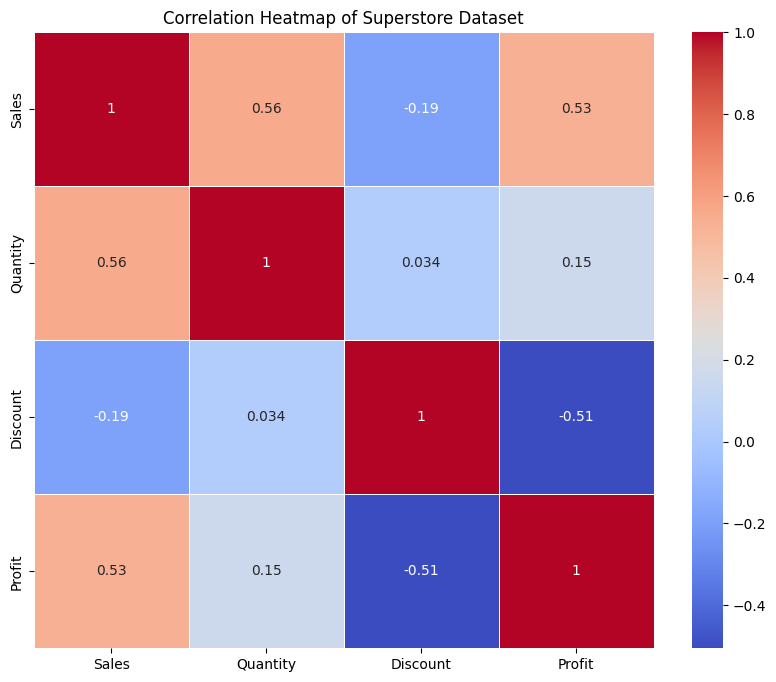

In [21]:
# Visualization with Heatmaps
# ------------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Superstore Dataset')
plt.show()

### **Interpretation of Correlation Heatmap**
The heatmap shows the correlations between the numerical columns in the dataset: **Sales**, **Quantity**, **Discount**, and **Profit**.

1. **Sales and Profit (Correlation: 0.53)**:
   - Positive correlation indicating that as sales increase, profits also tend to increase.
   - However, it's not a perfect correlation, suggesting some sales may not be very profitable.

2. **Sales and Quantity (Correlation: 0.56)**:
   - Positive correlation indicating that higher quantities sold usually lead to higher sales.
   - Makes sense as more products sold typically generate more revenue.

3. **Sales and Discount (Correlation: -0.19)**:
   - Slight negative correlation suggesting that giving discounts slightly reduces sales.
   - This could be due to overly generous discounts or ineffective discount strategies.

4. **Quantity and Profit (Correlation: 0.15)**:
   - Weak positive correlation indicating that increasing quantities doesn't strongly correlate with higher profits.
   - Selling more of low-margin products may result in less profit.

5. **Discount and Profit (Correlation: -0.51)**:
   - Strong negative correlation indicating that increasing discounts significantly reduces profit.
   - Suggests that giving excessive discounts is detrimental to profitability.

---




In [22]:
# Filtering Data & Creating Pivot Tables
# ----------------------------------------------
# Filter data for analysis of Sales & Profit by Region and Year
pivot_table = df_cleaned.pivot_table(
    index='Region', 
    columns='Year', 
    values=['Sales', 'Profit'], 
    aggfunc='sum'
)

# Displaying the pivot table
print(pivot_table)

                     Profit                                  Sales            \
Year                   2012     2013      2014      2015      2012      2013   
Region                                                                         
Canada                29.70    26.10     78.00     79.92     87.84    187.02   
Caribbean            771.39   735.22     41.20   3916.01   8821.51   4329.04   
Central Africa      1201.20  3818.94   4009.20    638.88   7956.66  10251.48   
Central America     2972.65  4297.81   6140.15   8331.34  25301.01  34188.93   
Central US           486.35   108.21   5073.63      7.83   1758.14   1771.10   
Eastern Africa       907.86      NaN   1263.84   2131.02   2777.16       NaN   
Eastern Asia       13831.08  2837.61  11946.81   9295.66  60821.92  26730.30   
Eastern Europe      4198.59   919.20   2669.46   4441.20  11786.43   5604.00   
Eastern US           566.28   231.38   1791.09    -43.86   1782.63   1004.49   
North Africa         317.52  1633.68   2

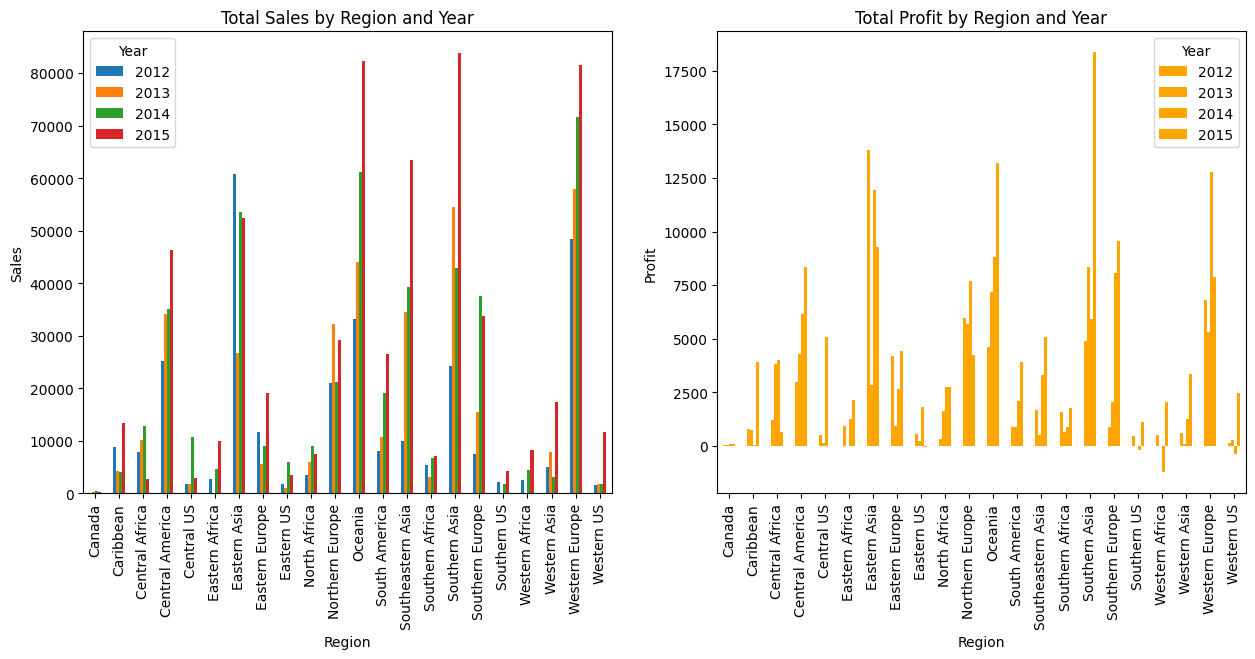

In [26]:
# Visualizations
# --------------------------------
# Plotting Sales & Profit Trends by Region and Year
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# Plotting Sales Trends
pivot_table['Sales'].plot(kind='bar', ax=ax[0])
ax[0].set_title('Total Sales by Region and Year')
ax[0].set_ylabel('Sales')
# Plotting Profit Trends
pivot_table['Profit'].plot(kind='bar', ax=ax[1], color='orange')
ax[1].set_title('Total Profit by Region and Year')
ax[1].set_ylabel('Profit')
plt.show()

### **Interpretation of Correlation Heatmap**
The heatmap shows the correlations between the numerical columns in the dataset: **Sales**, **Quantity**, **Discount**, and **Profit**.

1. **Sales and Profit (Correlation: 0.53)**:
   - Positive correlation indicating that as sales increase, profits also tend to increase.
   - However, it's not a perfect correlation, suggesting some sales may not be very profitable.

2. **Sales and Quantity (Correlation: 0.56)**:
   - Positive correlation indicating that higher quantities sold usually lead to higher sales.
   - Makes sense as more products sold typically generate more revenue.

3. **Sales and Discount (Correlation: -0.19)**:
   - Slight negative correlation suggesting that giving discounts slightly reduces sales.
   - This could be due to overly generous discounts or ineffective discount strategies.

4. **Quantity and Profit (Correlation: 0.15)**:
   - Weak positive correlation indicating that increasing quantities doesn't strongly correlate with higher profits.
   - Selling more of low-margin products may result in less profit.

5. **Discount and Profit (Correlation: -0.51)**:
   - Strong negative correlation indicating that increasing discounts significantly reduces profit.
   - Suggests that giving excessive discounts is detrimental to profitability.

---


